In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import math 

In [2]:
df = pd.read_csv("b.csv")
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [3]:
#df1 = df[df.columns('start_station_latitude', 'start_station_longitude', 'end_station_latitude'
        #'end_station_longitude')]
df1 = df[['start_station_latitude', 'start_station_longitude', 'end_station_latitude'
        ,'end_station_longitude']]
df1= df1.head()
df1

,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
0,37.776435,-122.426244,37.778768,-122.415929
1,37.784872,-122.400876,37.766210,-122.426614
2,37.870348,-122.267764,37.870348,-122.267764
3,37.774520,-122.409449,37.783899,-122.408445
4,37.868813,-122.258764,37.867789,-122.265896


In [4]:
df2  = df1.drop(["end_station_latitude", "end_station_longitude"], axis =1)
df2 = df2.rename(columns = {"start_station_latitude":"Latitude", "start_station_longitude":"Longitude"})
df2.head()




,Latitude,Longitude
0,37.776435,-122.426244
1,37.784872,-122.400876
2,37.870348,-122.267764
3,37.774520,-122.409449
4,37.868813,-122.258764


In [5]:
df3  = df1.drop(["start_station_latitude", "start_station_longitude"], axis =1)
df3 = df3.rename(columns = {"end_station_latitude":"Latitude", "end_station_longitude":"Longitude"})
df3.head()

,Latitude,Longitude
0,37.778768,-122.415929
1,37.766210,-122.426614
2,37.870348,-122.267764
3,37.783899,-122.408445
4,37.867789,-122.265896


In [13]:
df4 = pd.concat([df2,df3],axis = 0 )
df4.reset_index(inplace= True)
df4 = df4.rename(columns = {"index":"ID","Latitude":"lat", "Longitude":"lng"})


In [14]:
df4.head()

,ID,lat,lng
0,0,37.776435,-122.426244
1,1,37.784872,-122.400876
2,2,37.870348,-122.267764
3,3,37.774520,-122.409449
4,4,37.868813,-122.258764


In [34]:
sc_names = df4["ID"]
sc_names.dtype


dtype('int64')

In [32]:
df4.set_index('ID').T.to_dict('list')

/home/allen2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  """Entry point for launching an IPython kernel.


{0: [37.7787677, -122.41592920000001],
 1: [37.7662102, -122.4266136],
 2: [37.8703477, -122.26776370000002],
 3: [37.78389935708493, -122.40844488143921],
 4: [37.867789200000004, -122.26589640000002]}

In [35]:
def distance_on_earth(lat1, long1, lat2, long2, radius=6378.388):
    
    # Convert latitude and longitude to spherical coordinates in radians.
    degrees_to_radians = np.pi / 180.0

    # phi = 90 - latitude
    phi1 = (90.0 - lat1) * degrees_to_radians
    phi2 = (90.0 - lat2) * degrees_to_radians

    # theta = longitude
    theta1 = long1 * degrees_to_radians
    theta2 = long2 * degrees_to_radians
         
    # Compute spherical distance from spherical coordinates.     
    cos = (np.sin(phi1) * np.sin(phi2)* np.cos(theta1 - theta2) + 
           np.cos(phi1) * np.cos(phi2))
    arc = np.arccos(cos)
    rv = arc * radius
    return rv

In [37]:
distances = {}
for i in range(len(sc_names)):
    a = sc_names[i]
    distances[a] = {}
    for j in range(len(sc_names)):
        b = sc_names[j]
        if j == i:
            distances[a][b] = 0.
        elif j > i:
            distances[a][b] = distance_on_earth(df4.ix[a, 'lat'],
                                                df4.ix[a, 'lng'],
                                                df4.ix[b, 'lat'],
                                                df4.ix[b, 'lng'])
        #else:
            #distances[a][b] = distances[b][a]
distances = pd.DataFrame(distances)

In [39]:
distances

,0,1,2,3,4
0,0.000000,NaN,NaN,NaN,NaN
1,2.421637,0.000000,NaN,NaN,NaN
2,17.421648,15.084465,0.000000,NaN,NaN
3,1.493089,1.377346,16.402379,0.000000,NaN
4,17.962689,15.603596,0.809148,16.904784,0.0


In [ ]:
#here we can see a table of the distances etween each cluster 
#Thus we now have the weights of the graph, and bythe use if tsp can caluclate
#the ideal path 

Text(0.5,0,'miles')

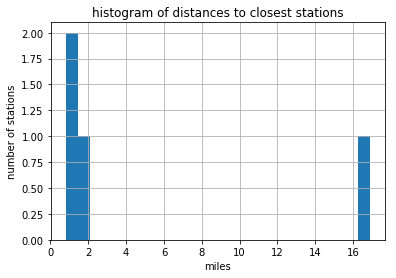

In [40]:
closest_distances = distances[distances > 0].min()
ax = closest_distances.hist(bins=25)
ax.set_title('histogram of distances to closest stations')
ax.set_ylabel('number of stations')
ax.set_xlabel('miles')



In [41]:
closest_distances.describe()

count     4.000000
mean      5.146092
std       7.844824
min       0.809148
25%       1.235297
50%       1.435218
75%       5.346012
max      16.904784
dtype: float64

In [10]:
df5 = df4["Latitude"]
df5 = df5.values
df5


array([37.77643482, 37.78487208, 37.8703477 , 37.7745204 , 37.8688126 ,
       37.7787677 , 37.7662102 , 37.8703477 , 37.78389936, 37.8677892 ])

In [11]:
df6 = df4["Longitude"]
df6 = df6.values
df6

array([-122.42624402, -122.40087569, -122.2677637 , -122.40944937,
       -122.258764  , -122.4159292 , -122.4266136 , -122.2677637 ,
       -122.40844488, -122.2658964 ])

In [12]:
import matplotlib.ticker as ticker

In [13]:
a = np.array([[2., 3., 8.], [10., 4., 3.]])
a = np.array([df5,df6]).T
a

array([[  37.77643482, -122.42624402],
       [  37.78487208, -122.40087569],
       [  37.8703477 , -122.2677637 ],
       [  37.7745204 , -122.40944937],
       [  37.8688126 , -122.258764  ],
       [  37.7787677 , -122.4159292 ],
       [  37.7662102 , -122.4266136 ],
       [  37.8703477 , -122.2677637 ],
       [  37.78389936, -122.40844488],
       [  37.8677892 , -122.2658964 ]])

In [14]:
import numpy as np
from scipy.spatial.distance import cdist, euclidean

def geometric_median(X, eps=1e-5):
    y = np.mean(X, 0)

    while True:
        D = cdist(X, [y])
        nonzeros = (D != 0)[:, 0]

        Dinv = 1 / D[nonzeros]
        Dinvs = np.sum(Dinv)
        W = Dinv / Dinvs
        T = np.sum(W * X[nonzeros], 0)

        num_zeros = len(X) - np.sum(nonzeros)
        if num_zeros == 0:
            y1 = T
        elif num_zeros == len(X):
            return y
        else:
            R = (T - y) * Dinvs
            r = np.linalg.norm(R)
            rinv = 0 if r == 0 else num_zeros/r
            y1 = max(0, 1-rinv)*T + min(1, rinv)*y

        if euclidean(y, y1) < eps:
            return y1

        y = y1

In [15]:
b = geometric_median(a)
b

array([  37.78486355, -122.40098134])

In [16]:
print(b[0])

37.784863545206726


Text(0,0.5,'Latitude')

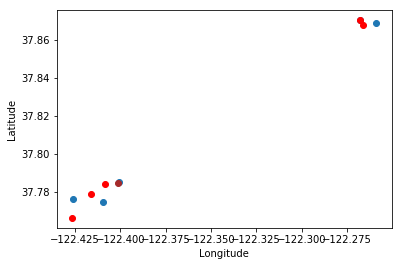

In [17]:
x = df1.start_station_longitude
y = df1.start_station_latitude
plt.plot(x,y,ls ='', marker='o',)
plt.plot(df1.end_station_longitude,df1.end_station_latitude,ls ='', marker='o',
        color = 'red')
plt.plot(b[1],b[0],ls ='', marker = 'o', color ='brown')


plt.xlabel("Longitude") 
plt.ylabel("Latitude")


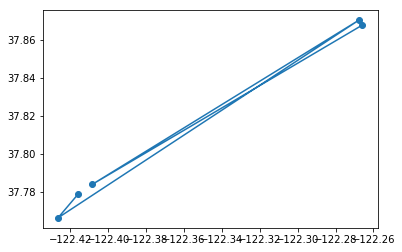

In [18]:
import matplotlib.pyplot as plt
plt.plot(df1.end_station_longitude,df1.end_station_latitude, marker = 'o')

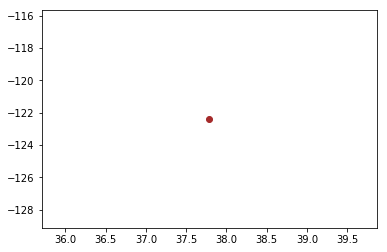

In [19]:
plt.plot(b[0],b[1],ls ='', marker = 'o', color ='brown')

([<matplotlib.axis.YTick at 0x7fb0bdd1c5f8>,
 <a list of 117 Text yticklabel objects>)

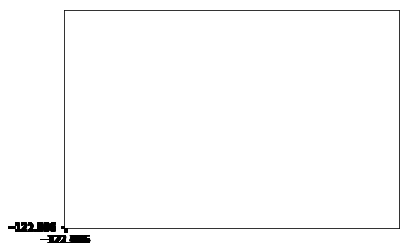

In [20]:
plt.xticks(np.arange(min(x), max(x)+1, 0.02))
plt.yticks(np.arange(min(x), max(x)+1, 0.01))

In [21]:
df.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male


In [22]:
from sklearn.cluster import KMeans
a = np.array([df5,df6]).T
kmeans = KMeans(n_clusters=3, random_state=0, tol = 0.001).fit(a)
kmeans.labels_

array([2, 0, 1, 0, 1, 0, 2, 1, 0, 1], dtype=int32)

In [23]:
#for i in range(0, kmeans.shape[0]):

In [24]:
centers = kmeans.cluster_centers_ 
centers

array([[  37.78051489, -122.40867478],
       [  37.8693243 , -122.26504695],
       [  37.77132251, -122.42642881]])

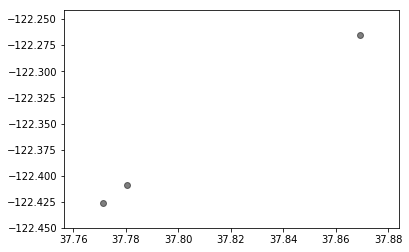

In [25]:
plt.scatter(centers[:, 0], centers[:, 1], c='black', alpha=0.5);

TypeError: inner() got multiple values for argument 'ax'

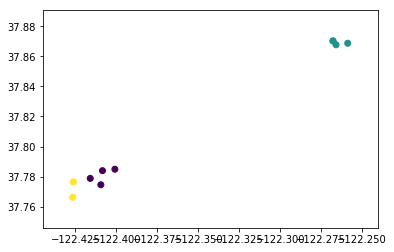

In [26]:
plt.figure(figsize=(6, 4))
ax = plt.scatter(a[:,1], a[:,0], c=kmeans.labels_.astype(float))
plt.scatter(centers[:, 0], centers[:, 1], c='black', alpha=0.5, ax = ax);
plt.title("K=3 Cluster")
plt.xlabel("Height(cm)")
plt.ylabel("Weight(kg's)")
plt.show()

In [28]:
q = df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
start_station_latitude     5 non-null float64
start_station_longitude    5 non-null float64
end_station_latitude       5 non-null float64
end_station_longitude      5 non-null float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans2, whiten

coordinates= np.array([
               [lat, long],
               [lat, long],
                ...
               [lat, long]
               ])
    x, y = kmeans2(whiten(coordinates), 3, iter = 20)  
    plt.scatter(coordinates[:,0], coordinates[:,1], c=y);
    plt.show()

In [46]:
df4.head()

,ID,lat,lng
0,0,37.776435,-122.426244
1,1,37.784872,-122.400876
2,2,37.870348,-122.267764
3,3,37.774520,-122.409449
4,4,37.868813,-122.258764


In [60]:
df_1 = df['start_station_name']
df_1  = df_1.head(10)

In [62]:
df_1 = pd.Series.to_frame(df_1)
df_1.head()

,start_station_name
0,Laguna St at Hayes St
1,Yerba Buena Center for the Arts (Howard St at ...
2,Downtown Berkeley BART
3,8th St at Ringold St
4,Bancroft Way at Telegraph Ave


In [63]:
df_2 = pd.concat([df_1, df4], axis = 1)

In [68]:
df_2 = df_2.drop("ID", axis= 1)


In [69]:
df_2.reset_index(inplace = True)

In [71]:
locations = df_2[['lat', 'lng']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

[37.8703477, -122.26776370000002]

In [79]:
map_osm = folium.Map(location=[38.9072, -77.0369],tiles='Stamen Toner',
           zoom_start=13)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df_2['start_station_name'][point]).add_to(map_osm)
map_osm

In [2]:
import numpy as np
from matplotlib import pyplot
import random
import matplotlib.cm as cm
from haversine import haversine
import math

def show_kmeans(points, centers=None):
	#http://stackoverflow.com/questions/9401658/matplotlib-animating-a-scatter-plot
	xs=[]
	ys=[]
	c=[]
	wts=[]
	m=[]
	colors = list(iter(cm.rainbow(np.linspace(0, 1, len(centers)))))
	for p in points:
		xs.append(p['coords'][0])
		ys.append(p['coords'][1])
		c.append(colors[p['c']])
		#wts.append(40+p['w'])
		wts.append(3)
		m.append('o')

	if centers:
        
		for i,cl in enumerate(centers):
			xs.append(cl['coords'][0])
			ys.append(cl['coords'][1])
			c.append('yellow')
			wts.append(500)
			m.append('*')

	for _s, _c, _x, _y,_sz in zip(m, c, xs, ys,wts):
		pyplot.scatter(_x, _y, marker=_s, c=_c,s=_sz, lw = 0)

	pyplot.show()

def distance(lat1,long1,lat2,long2):
	return haversine((lat1,long1), (lat2,long2), miles=True)

def data_weighted_kmeans(points,centers,k,it_max=100):
	'''
		Implements weighted k-means where individual data points are weighted
		Code was ported from matlab code:
			http://people.sc.fsu.edu/~jburkardt/m_src/kmeans/kmeans.html
			specifically http://people.sc.fsu.edu/~jburkardt/m_src/kmeans/kmeans_w_03.m
		A natural extension of the K-Means problem allows us to include some more information, namely, 
		a set of weights associated with the data points. These might represent a measure of importance, 
		a frequency count, or some other information. The intent is that a point with a weight of 5.0 is 
		twice as "important" as a point with a weight of 2.5, for instance. This gives rise to the 
		"weighted" K-Means problem.
		In the weighted K-Means problem, we are given a set of N points X(I) in M-dimensions, and a 
		corresponding set of nonnegative weights W(I). The goal is to arrange the points into K clusters, 
		with each cluster having a representative point Z(J), usually chosen as the weighted centroid of 
		the points in the cluster:
		Z(J) = Sum ( all X(I) in cluster J ) W(I) * X(I) / Sum ( all X(I) in cluster J ) W(I).
	
		The weighted energy of cluster J is
			E(J) = Sum ( all X(I) in cluster J ) W(I) * || X(I) - Z(J) ||^2
		Inputs:
		points: list of dictionaries
			with keys: 
				coords: np.array of real/integer values
				w: positive real
		centers: list of dictionaries
			with keys: 
				coords: np.array of real/integer values
		k: number of clusters
		it_max: max number of iterations
	'''
	# number of dimensions
	d = len(points[0]['coords'])

	for c in centers:
		c['n'] = 0
		c['w'] = 0

	#Assign each observation to the nearest cluster center.
	for p in points:
		distances=[]
		for c in centers:
			distances.append(sum((p["coords"]-c["coords"])**2))
		idx = np.argmin(distances)
		p['c'] = idx
		centers[idx]["n"]+=1
		centers[idx]["w"]+=p['w']

	for j,c in enumerate(centers):
		c["coords"] = np.zeros(d)

	#Average the points in each cluster to get a new cluster center.
	for p in points:
		centers[p['c']]["coords"] += p["coords"] * p['w']
	for c in centers:
		c["coords"] /= c['w']

	it_num = 0
	distsq = np.zeros(k)
	while ( it_num < it_max ):
		it_num +=1
		#print it_num
		swap = 0
		for i,p in enumerate(points):
			ci=p['c']
			
			if centers[ci]['n'] <= 1:
				continue

			for cj,c in enumerate(centers):
				lat1=p["coords"][1]
				long1=p["coords"][0]
				lat2=c["coords"][1]
				long2=c["coords"][0]
				if ci==cj:
					distsq[cj]= ( (distance(lat1,long1,lat2,long2)**2) * c['w'] ) / ( c['w'] - p['w'] )
				elif centers[cj]['n']==0:
					centers[cj]["coords"] = np.copy(p["coords"])
					distsq[cj]=0 
				else:
					distsq[cj]= ( (distance(lat1,long1,lat2,long2)**2) * c['w'] ) / ( c['w'] + p['w'] )

			# Find the index of the minimum value of DISTSQ.
			nearest_cluster = np.argmin(distsq)

			# If that is not the cluster to which point I now belongs, move it there.
			if nearest_cluster == ci:
				continue

			cj = nearest_cluster
			centers[ci]["coords"] = ( centers[ci]['w'] * centers[ci]["coords"] - p['w'] * p["coords"] ) / ( centers[ci]['w'] - p['w'] )
			centers[cj]["coords"] = ( centers[cj]['w'] * centers[cj]["coords"] + p['w'] * p["coords"] ) / ( centers[cj]['w'] + p['w'] )
			centers[ci]['n'] -= 1
			centers[cj]['n'] += 1
			centers[ci]['w'] -= p['w']
			centers[cj]['w'] += p['w']

			# assign the point its new home
			p['c'] = cj

			swap += 1
		# Exit if no reassignments were made during this iteration.
		if swap==0: 
			break
	return [points,centers,it_num]

def randomize_initial_cluster(points,k,seed=None):
	'''
		randomly select k starting points
	'''
	if seed:
		random.seed( seed )
	indices=range(0,len(points))
	random.shuffle(indices)
	centers=[]
	for i in indices[:k]:
		centers.append({"coords":np.copy(points[i]['coords'])})
	return centers

def equally_spaced_initial_clusters(points,k):
	'''
	set them equally spaced across x
	'''
	xs=[]
	ys=[]
	for p in points:
		xs.append(p['coords'][0])
		ys.append(p['coords'][1])
	xs=np.array(xs)
	meany = np.mean(np.array(ys))
	minx=np.min(xs)
	maxx=np.max(xs)
	if k==1:
		return [{"coords":np.array([np.mean(np.array(xs)), meany])}] 
	step = (maxx-minx) / (k-1)
	centers=[]
	[centers.append({"coords":np.array([minx + i * step, meany])}) for i in range(k)]
return centers

ModuleNotFoundError: No module named 'haversine'